In [51]:
import pandas as pd
import matplotlib.pyplot  as plt

from sklearn.model_selection import train_test_split as split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as  imputer


In [52]:
df = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [53]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


<Axes: xlabel='GarageQual'>

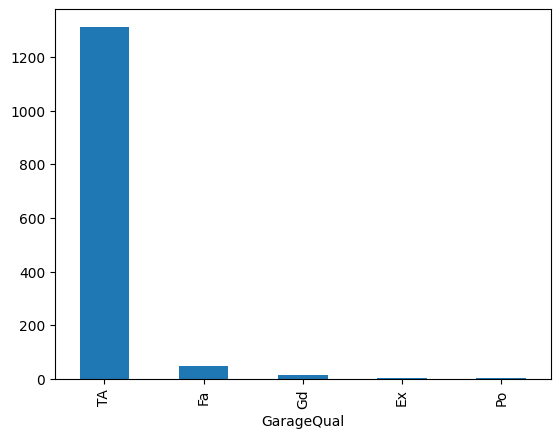

In [55]:
df['GarageQual'].value_counts().plot(kind = 'bar')

<Axes: xlabel='FireplaceQu'>

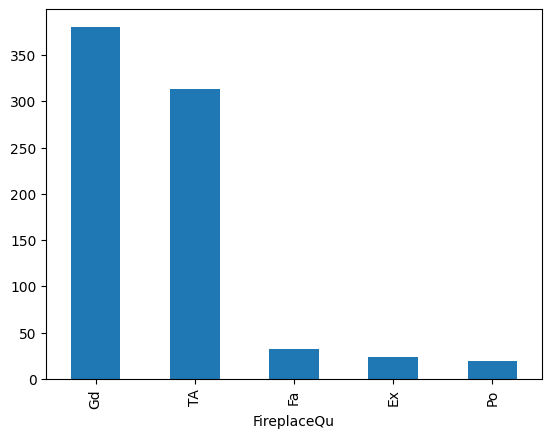

In [56]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

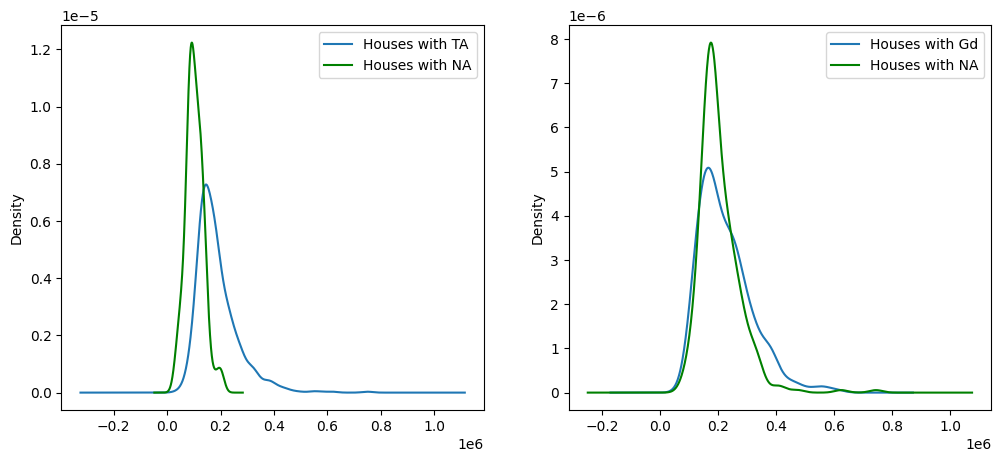

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))



df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde', ax = ax[0])
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax[0], color = 'green')
lines, labels = ax[0].get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax[0].legend(lines, labels, loc='best')


df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind = 'kde', ax = ax[1])
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind = 'kde', ax = ax[1], color = 'green')
lines, labels = ax[1].get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax[1].legend(lines, labels, loc='best')


In [58]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [59]:
temp.fillna('TA', inplace = True)

<ipython-input-59-a0ec15a635e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.fillna('TA', inplace = True)


<Axes: ylabel='Density'>

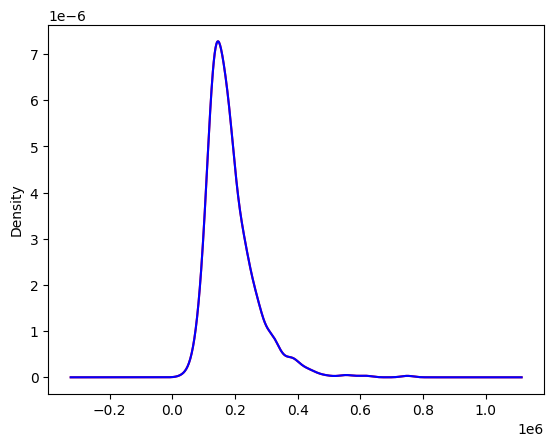

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax = ax, color='red')
temp.plot(kind='kde', ax = ax, color = 'blue')

In [63]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

<Axes: ylabel='Density'>

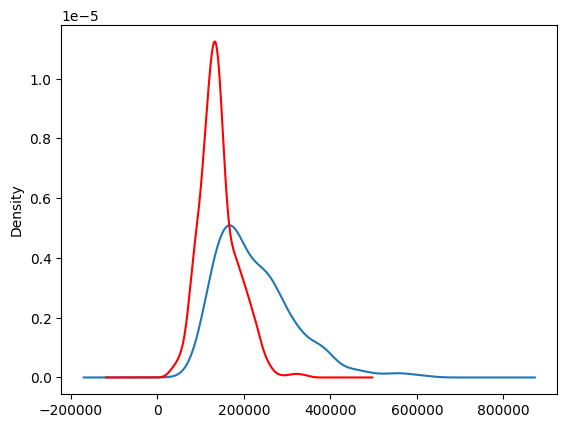

In [65]:
fig = plt.figure()

ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax = ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax = ax, color='red')


In [66]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace = True)

<Axes: ylabel='Density'>

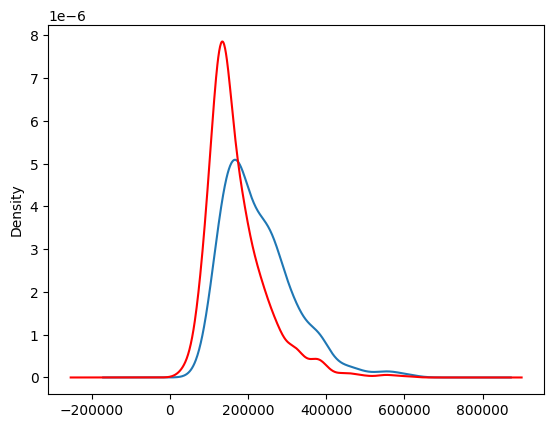

In [67]:
fig = plt.figure()

ax = fig.add_subplot(111)

temp.plot(kind='kde', ax = ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax = ax, color = 'red')

In [68]:
fill_method = imputer(strategy = 'most_frequent')

In [69]:
train_x, test_x, train_y, test_y = split(df.drop(columns = ['SalePrice']), df['SalePrice'], test_size = 0.2)

In [75]:
transformer = ColumnTransformer(transformers = [
    ('most_frequent', fill_method, ['FireplaceQu', 'GarageQual'])
], remainder = 'passthrough')

In [76]:
temp_train_x = transformer.fit_transform(train_x)
temp_test_x = transformer.transform(test_x)

In [77]:
new_train_x = pd.DataFrame(temp_train_x, columns = train_x.columns)
new_test_x = pd.DataFrame(temp_test_x, columns = test_x.columns)